# Computational Social Science Project #3 

### Name: 
### Riley VanMeter

*Semester:* Fall 2025

## 1. Introduction

### Load data 

In [79]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [80]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [81]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [82]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [83]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [84]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

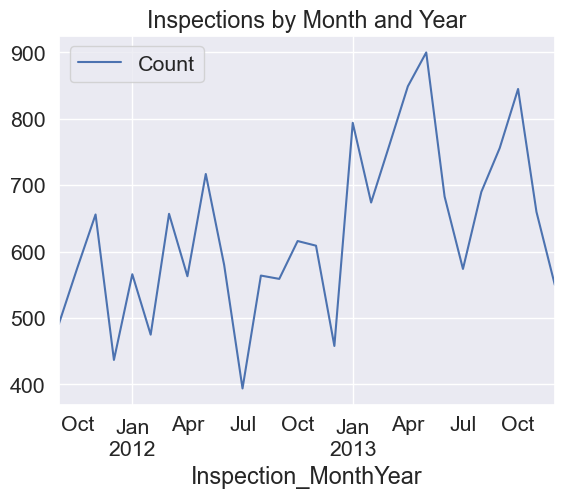

In [85]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 
plt.show()

Let's visualize what the distribution of results looks like.

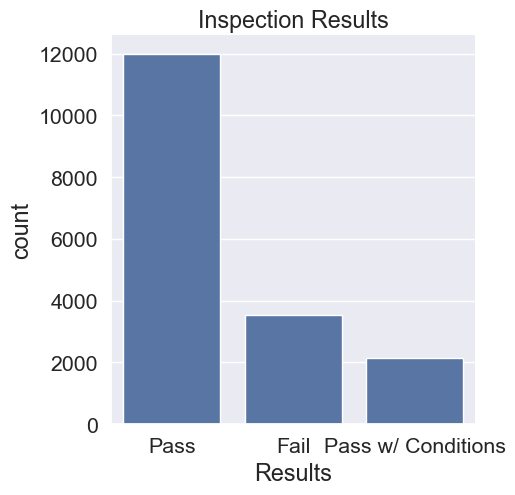

In [86]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

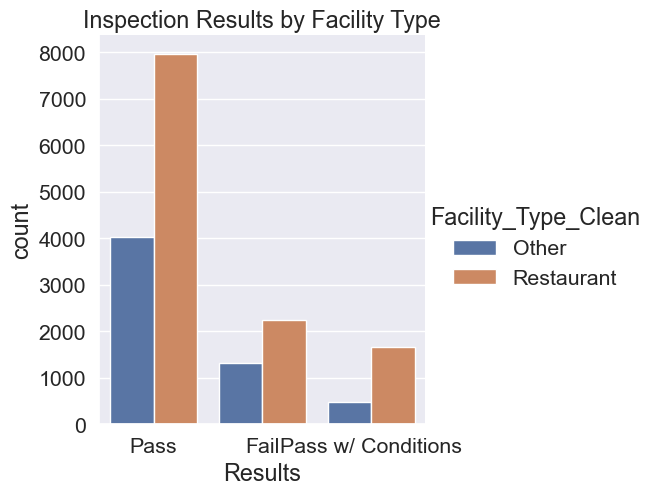

In [87]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [88]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [89]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [90]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1 - logistic regression
For the first model, I chose a basic logistic regression. This regression assumes a linear combination of predictors. This is possibly a con for when relationships are nonlinear. Although not included here, this model does allow for random effects which could be helpful here for variables such as facility type. The pros of this model is its relatively low computational load, rather ease of interpritability. The bigest con is, again, the assumptiuon of linearity in the log-odds.

In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

# settings
%matplotlib inline
sns.set_style("darkgrid")

In [92]:
# Set seed
np.random.seed(10)

# training and test split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size = .80, 
                                                    test_size=0.20,
                                                    stratify=y)

# training and validation split 
X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            train_size = .75, 
                                                            test_size = .25, 
                                                            stratify = y_train)

In [93]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred = logit_model.predict(X_validate)

In [94]:
# extract the coefficents and create a dataframe for plotting 
logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(logit_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])


print('Validation of basic log reg')

print('Validation Accuracy', accuracy_score(y_pred, y_validate))
print('Validation recall', recall_score(y_pred, y_validate))
print('Validation precision', precision_score(y_pred, y_validate))
print('Validation F1', f1_score(y_pred, y_validate))

Validation of basic log reg
Validation Accuracy 0.9160679294578706
Validation recall 0.7702702702702703
Validation precision 0.8314424635332253
Validation F1 0.7996882307092751


In [95]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))
print('Validation recall', recall_score(best_logit_pred, y_validate))
print('Validation precision', precision_score(best_logit_pred, y_validate))
print('Validation F1', f1_score(best_logit_pred, y_validate))


{'C': np.float64(0.1), 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9150881776616591
Validation recall 0.7613469985358712
Validation precision 0.8427876823338736
Validation F1 0.8


###  Model 2 - random forest
For the second model, I chose a random forest. Random forest is an ensamle method that uses bagging to sample the training data with replacement so that each of the 100 trees sees a slightly different version of the dataset. This reduces variance by averaging across many models. A pro of this model is that it can reduce overfitting. Another pro is that it is much better than the logistic regression at dealing with non-linear relationships. The random forest is, however, slightly harder to interpreate with no coeffieicnts- for this reason, averaged feature importance is used alongside visualizing individual trees in interpretation.

In [96]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

%matplotlib inline
#sns.set_style("darkgrid")

In [97]:
# initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              # specify the number of trees (100 is default)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

In [98]:
# specify cross-validation
# ----------
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), # Some algorithms will expect you to ravel the target
                         cv=5)

In [99]:
# calculate the average score across models
# ----------
scores.mean()

np.float64(0.9214291091093141)

In [100]:
cv_results_rf = cross_validate(rf_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results_rf[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.921
recall: 0.871
precision: 0.770
f1: 0.817


In [101]:
# fit the random forest on data to get feature importance (plot in section below)
# ----------
rf_classifier.fit(X, y.ravel())

RandomForestClassifier(max_features=None, min_impurity_decrease=1e-07,
                       random_state=10)

In [102]:
# attempt at hyperparamerterizing-ish by refitting a basic decision tree using reduced number of features 
# ----------
# import library
import seaborn as sns

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]


dt_reduced_classifier = tree.DecisionTreeClassifier(
                                 # specify parameters
                                 criterion='gini',              # or 'entropy' for information gain
                                 splitter='best',               # or 'random' for random best split
                                 max_depth=5,                   # how deep tree nodes can go
                                 min_samples_split=2,           # samples needed to split node
                                 min_samples_leaf=1,            # samples needed for a leaf
                                 min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                                 max_features=None,             # number of features to look for when splitting
                                 max_leaf_nodes=None,           # max nodes
                                 min_impurity_decrease=1e-07,   # early stopping
                                 random_state = 10)             # random seed

# pull out the most features
important_features = feat_importances.nlargest(10, 'Importance')['Feature']

# create new dataset with only most important features
X_reduced = X[X.columns[X.columns.isin(important_features)]]

# fit the model on the new reduced model
dt_reduced_classifier.fit(X_reduced,
                          y)

# set column names as list
reduced_column_names = X_reduced.columns.tolist()

dt_reduced_classifier_scores = cross_val_score(dt_reduced_classifier, 
                         X, 
                         y.ravel(),
                         cv=5)

# find the mean score across models
dt_reduced_classifier_scores.mean()


np.float64(0.9204492080419614)

In [103]:
# calculate validation metrics of the random forest using cross validation
# ----------
scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(),
                         cv=5)

# find the mean score across models
scores.mean()

cv_results_rf = cross_validate(rf_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results_rf[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")


accuracy: 0.921
recall: 0.871
precision: 0.770
f1: 0.817


### Model 3- XG Boost

XG boost uses sequential weak learners to train the models instead of creating a random forest. XG boost uses Gradient Descent to minimize a loss function and improve fit. If I udnerstand correctly, this means that the model is an ensamble of many smaller decision trees with each one correcting the errors of the previous ones. Like random forest, this model does not assume linearity nor normal distribution. A pro is that the shrinkage reduces overfitting. A con is that this model is typically slower to run than a normal random forest.

In [104]:
import xgboost as xgb

In [105]:
# initialize an XGBoost classifier
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)


# define the scoring metrics
scoring = {
          'accuracy': make_scorer(accuracy_score),
          'recall': make_scorer(recall_score),
          'precision': make_scorer(precision_score),
          'f1': make_scorer(f1_score)
          }


# perform cross-validation with 5-fold and return the trained estimators
cv_results = cross_validate(xgb_classifier,        # specify estimator 
                            X,                     # specify features
                            y.ravel(),             # specify outcome, and use ravel
                            cv=5,                  # specify 5-fold cross validation
                            return_estimator=True, # return the estimators fitted at each split
                            scoring=scoring)       # which scoring metrics to return (the whole list in this case)
 
# print the results for accuracy, recall, precision, and F1 score
for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    scores = cv_results[metric]
    print(f"{metric[5:]}: {scores.mean():.3f}")

accuracy: 0.919
recall: 0.839
precision: 0.779
f1: 0.807


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

I believe F1 to be a good validation metric for this question because this best balances both recall and precision. This gives us a balanced answer to both questions, "of all the real positives, how many did we correctly identify?" (recall), and "of all predicted positive, how many were actually positive?" (precision). In this case, we want to both frequently correctly identify which establishments are likely to fail, and also make predictions which are precise, in that the establishments we predict to fail are actually failing.

## NOTE: All validation metrics are above, listed after each model, but here is accuracy for each model listed again.

In [106]:

#All validation metrics are above after each model, but here is accuracy for each model listed again

# Logistic Regression - using liblinear solver
# ----------
logit_reg = LogisticRegression(random_state = 10, 
                             solver='liblinear')

# Random Forest
# ----------
rf_classifier = RandomForestClassifier(
                       criterion='gini',              # you can also use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed



# XGBoost
# ----------
xgb_classifier = xgb.XGBClassifier(random_state=10)


# loop through each model to report accuracy
# ----------
for clf, label in zip([logit_reg, 
                       rf_classifier, 
                       xgb_classifier], ['Logistic Regression', 
                                            'Random Forest', 
                                            'XGBoost']):
         scores = cross_val_score(clf, 
                                  X, 
                                  y.ravel(),
                                  scoring='accuracy', 
                                  cv=5)
         print('Accuracy: %0.005f [%s]' % (scores.mean(), label))

Accuracy: 0.92071 [Logistic Regression]
Accuracy: 0.92143 [Random Forest]
Accuracy: 0.91927 [XGBoost]


## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

After analysis via plots (below), it seems that seriousCount is far and beyond the most predictive feature, increasing the likeliness to fail. This makes sense in that establishments which have failed "seriously" in the past are likely to fail again, or fail subsequently with a lesser rating.

All other features are much less important. However the lesser features still do improve model accuracy as shown by the reduced accuracy of a reduced-feature decision tree.

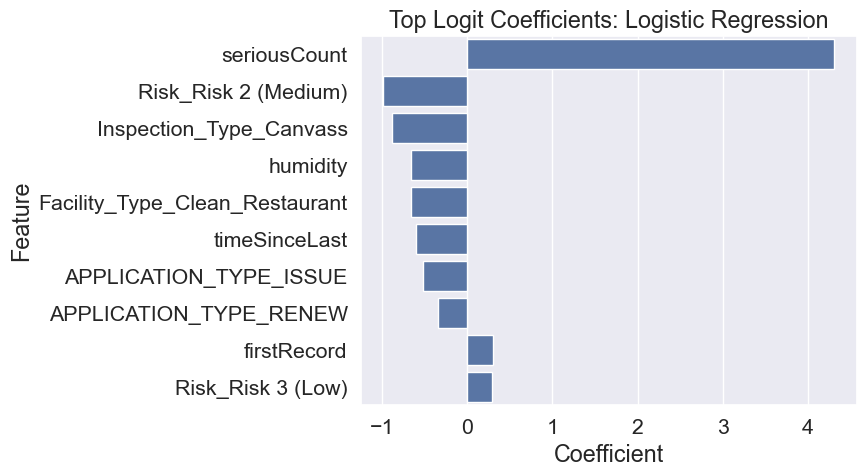

In [107]:
# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients: Logistic Regression")
plt.show()

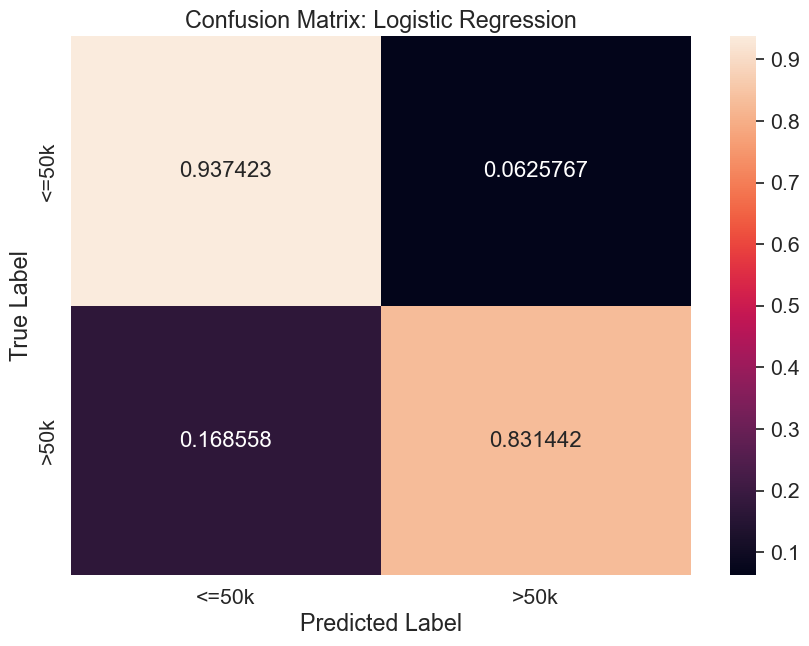

In [108]:
# create a confusion matrix
cf_matrix = confusion_matrix(y_validate, 
                             y_pred, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

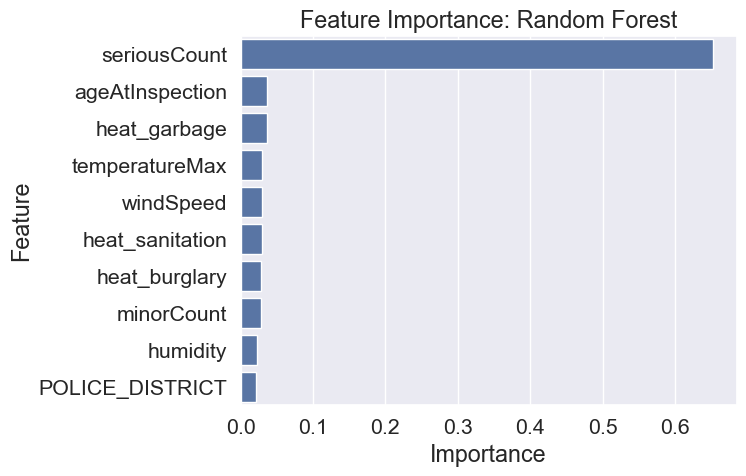

In [109]:
# import library
import seaborn as sns

rf_classifier.fit(X, y.ravel())

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.title("Feature Importance: Random Forest")
plt.show()

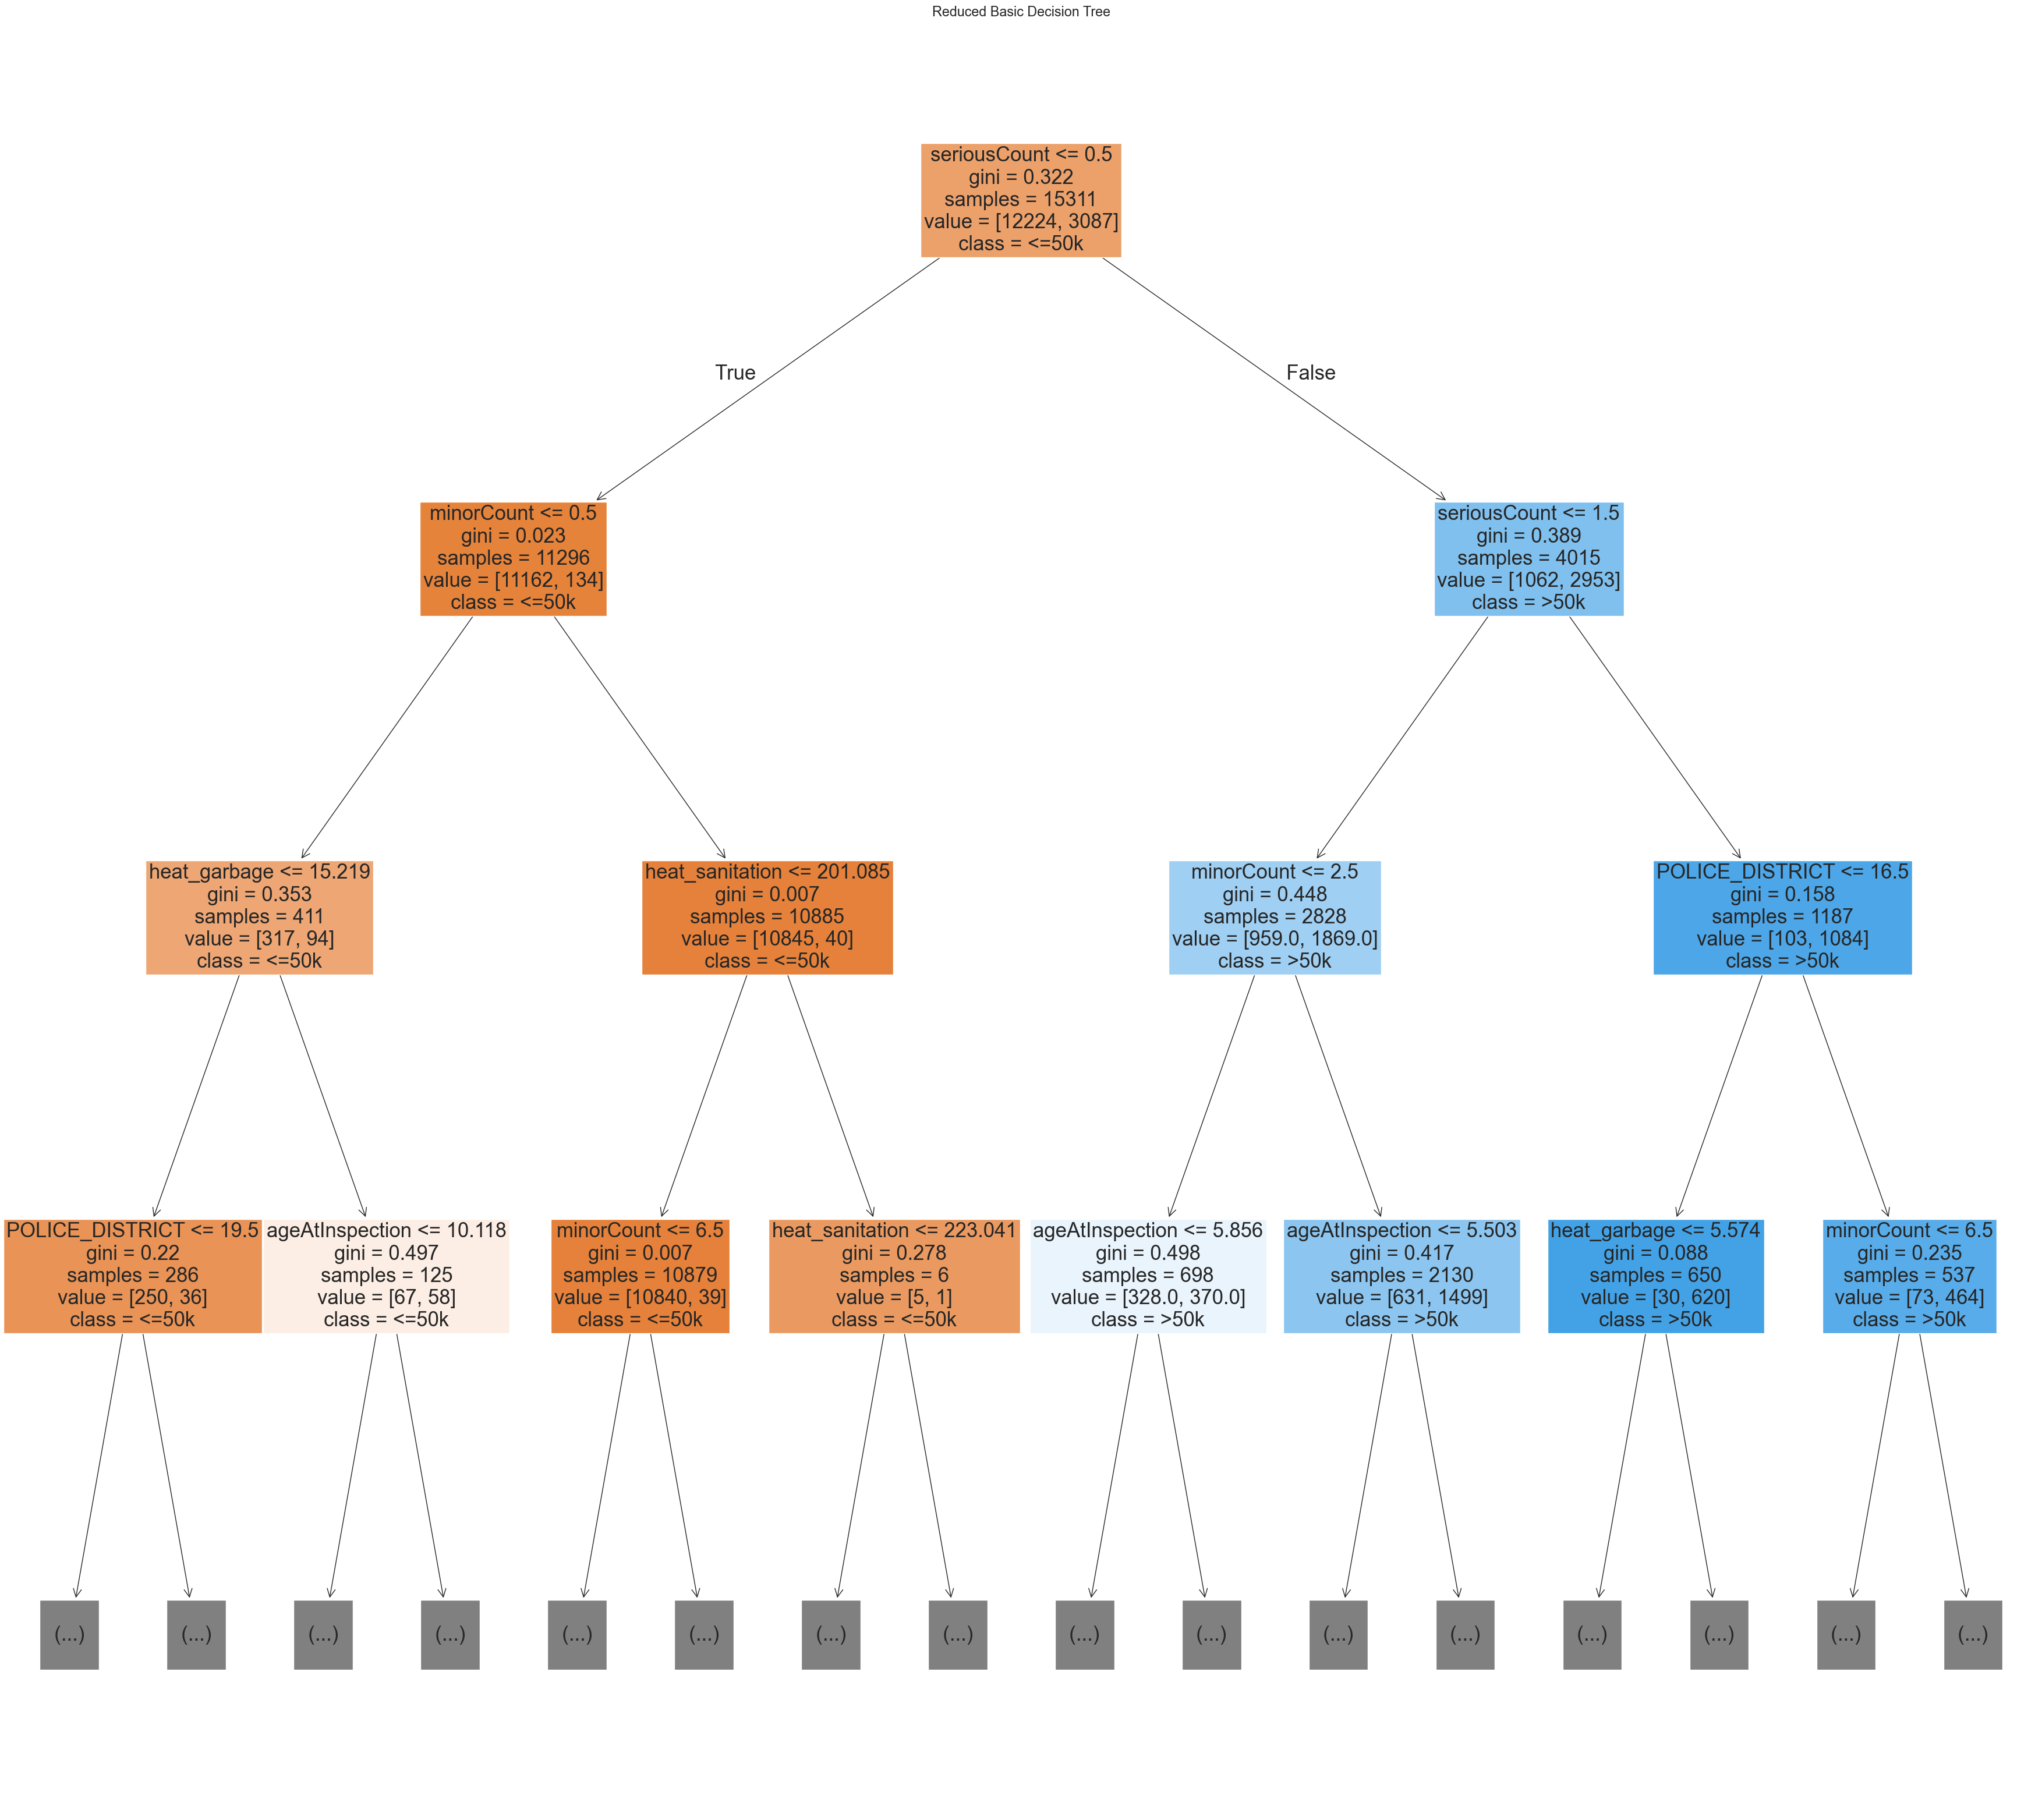

In [110]:
# plot 
fig = plt.figure(figsize=(45,40))
_ = tree.plot_tree(decision_tree = dt_reduced_classifier,                          
                   feature_names=reduced_column_names,  # make sure its a list
                   class_names=["<=50k", ">50k"],       # specify class names
                   filled=True,                         # paint nodes to indicate majority class 
                   fontsize = 25,                       # set fontsize
                   max_depth = 3)                       # set max depth of tree to view   
plt.title('Reduced Basic Decision Tree')
plt.show()

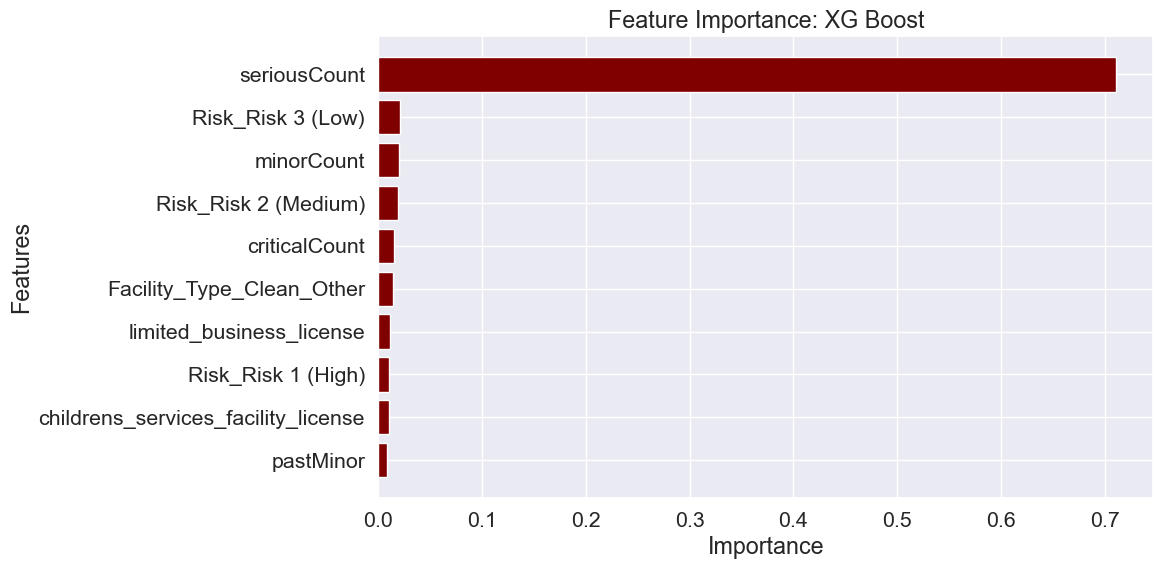

In [111]:
# feature importance for XGboost
# ----------

# Initialize an array to hold the feature importances
importances = np.zeros(X.shape[1])

# Average the feature importances over the folds
for estimator in cv_results['estimator']:
    importances += estimator.feature_importances_
    
# Divide by the number of folds
importances /= 5  

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'feature': X.columns, 
                                   'importance': importances})

# Sort the features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Take the top 10 features
feature_importance = feature_importance.head(10)

# Plot the feature importances
plt.figure(figsize=(10, 6))

# horizontal bar plot
plt.barh(feature_importance['feature'], 
         feature_importance['importance'], 
         color='maroon', 
         align='center')

# labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance: XG Boost')

# gca stands for "get current axis", which allows you to modify the properties of the axes.
# and then inverts the y-axis, meaning that the values that were at the bottom will now be at the top, and vice versa.
plt.gca().invert_yaxis() 
plt.show()

In [112]:
voting_classifier = VotingClassifier(
                        # specify estimators to use
                        estimators = [('lr', logit_reg),
                                     ('rf', rf_classifier), 
                                     ('xgb', xgb_classifier)],
                        # specify voting 
                        voting = 'soft')

# fit each classifer "c" to the data, predict the probability of tha clasifer and store as "probas"
probas_ensamble = [c.fit(X, y.ravel()).predict_proba(X)[:,1] for c in (logit_reg, 
                                                              rf_classifier,
                                                              xgb_classifier,
                                                              voting_classifier)]


In [113]:
# create a dataset from the predicted probabilities
# ----------
probas_ensamble_df = pd.DataFrame.from_records(probas_ensamble).T # pulls the list of "probas" and stores as dataframe
probas_ensamble_df.rename(columns = {0: 'logit',
                           1: 'rf',
                           2: 'xgb',
                           3: 'ensemble'}, 
                inplace = True)

# view the first few observations
# ----------
probas_ensamble_df.head(10)

,logit,rf,xgb,ensemble
0,0.055424,0.00,0.000063,0.018496
1,0.020248,0.00,0.000114,0.006787
2,0.990895,0.98,0.862935,0.944610
3,0.023937,0.00,0.000234,0.008057
4,0.975626,0.86,0.945848,0.927158
5,0.563094,0.93,0.923991,0.805695
6,0.018120,0.00,0.000096,0.006072
7,0.007995,0.00,0.000132,0.002709
8,0.035918,0.00,0.000080,0.011999
9,0.012466,0.00,0.000148,0.004205


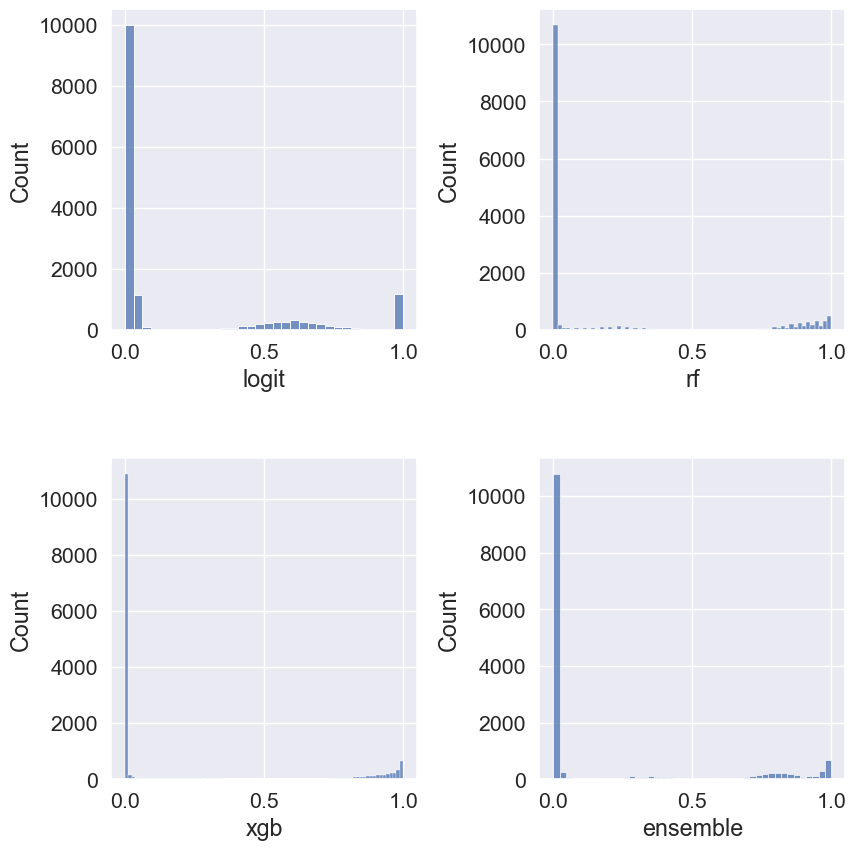

In [114]:
# visualize distributions
# ----------
# set figure parameters
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# logit
ax = fig.add_subplot(2, 3, 1)
sns.histplot(probas_ensamble_df, x="logit", ax=ax)

# random forest
ax = fig.add_subplot(2, 3, 2)
sns.histplot(probas_ensamble_df, x="rf", ax=ax)

# xgboost
ax = fig.add_subplot(2, 3, 4)
sns.histplot(probas_ensamble_df, x="xgb", ax=ax)

# ensemble
ax = fig.add_subplot(2, 3, 5)
sns.histplot(probas_ensamble_df, x="ensemble", ax=ax)

# show plot 
plt.show()

#### Discussion on this section

Which features contribute to your predictions? Are there any additional
features you wish you could incorporate that you don’t have available in this
analysis?

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [115]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# chosen model: logistic regression
# -----------
probas = logit_model.predict_proba(X)

probas = pd.DataFrame(probas)

probas

,0,1
0,0.965020,0.034980
1,0.981266,0.018734
2,0.008570,0.991430
3,0.975417,0.024583
4,0.024292,0.975708
...,...,...
15306,0.984651,0.015349
15307,0.994190,0.005810
15308,0.000073,0.999927
15309,0.962589,0.037411


In [116]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
probas = probas.sort_values(1)


first_1000_probs = probas.head(100)

first_1000_probs


,0,1
14785,0.996780,0.003220
8653,0.996762,0.003238
4806,0.996727,0.003273
13577,0.996612,0.003388
13699,0.996542,0.003458
...,...,...
7097,0.994865,0.005135
3044,0.994860,0.005140
13917,0.994852,0.005148
14783,0.994852,0.005148


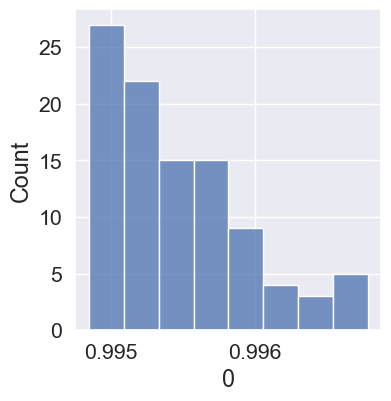

In [117]:

# visualize distributions
# ----------

# set figure parameters
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


ax = fig.add_subplot(2, 3, 2)

sns.histplot(first_1000_probs, x=0, ax=ax) 

# show plot
plt.show()

How well did the algorithm prioritize finding potential violations: The algorithm did a rather good job, picking only establishments with a probability above 99%.

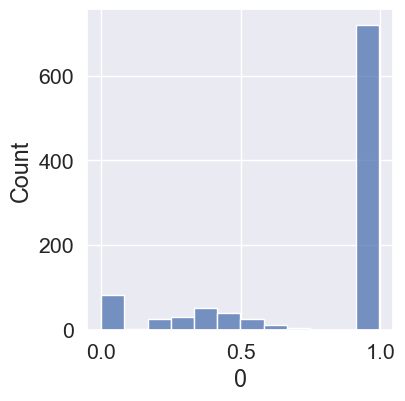

In [118]:
#Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

probas_sample_thousand = probas.sample(n=1000)
# set figure parameters
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# random forest
ax = fig.add_subplot(2, 3, 2)
sns.histplot(probas_sample_thousand, x=0, ax=ax)

# show plot 
plt.show()

How well did random audits do? How did random auditing compare to predictive auditing?

Random audits did much worse than predictive auditing at identifying which establishments were more likely to fail.

Use your favorite model to make predictions based on the features in “Chicago
Inspection 2014.csv” (be sure to use the “updated” file). Then compare your
predictions with the actual (“Results” column). Remember to remove the “Results” column from feature data before you predict. After you make your predictions, choose a metric that you think makes the most sense from a policy
perspective, explain your choice, and discuss your model’s performance.

In [119]:
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                ],
                                     inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)



In [120]:
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])  

In [121]:
chicago_inspections_2014

,,Inspection_Date,Facility_Type,Risk,Inspection_Type,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_DESCRIPTION,APPLICATION_TYPE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Results
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
920444,GALLISTEL LANGUAGE ACADEMY,2014-01-15,School,Risk 1 (High),Canvass,Other,0,1,5,0,0,0,2,0.964384,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,41.670000,13.533333,0.726667,2.149376,7.705332,9.535848,0,Fail
920445,SUBWAY,2014-02-03,Restaurant,Risk 1 (High),Canvass,Restaurant,2,0,0,0,0,0,0,0.794521,0,10-38,4.0,Retail Food Establishment,ISSUE,2012-08-29,2018-09-15,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.160000,6.020000,0.746667,12.034833,7.194320,1.219222,1,Pass w/ Conditions
920446,SHARKS FISH & CHICKEN,2014-02-03,Restaurant,Risk 2 (Medium),Canvass,Restaurant,0,0,6,0,0,0,2,0.660274,0,7-49,4.0,Retail Food Establishment,RENEW,2004-03-02,2018-07-15,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.160000,6.020000,0.746667,26.292725,27.837325,12.401466,0,Pass
920448,P K PETRO INC.,2014-03-07,Grocery Store,Risk 3 (Low),Canvass,Other,0,1,7,0,0,0,0,2.000000,1,5-21,3.0,Retail Food Establishment,RENEW,2003-03-05,2018-12-15,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.300000,7.653333,0.636667,49.468944,11.282325,66.467028,0,Fail
920449,"Z T DOLLAR EXCHANGE,INC",2014-03-07,Grocery Store,Risk 3 (Low),Canvass,Other,1,2,5,0,0,0,0,2.000000,1,7-40,3.0,Retail Food Establishment,ISSUE,2012-10-09,2018-12-15,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.300000,7.653333,0.636667,69.939833,26.695701,76.827119,1,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506245,TORTILLA SOUP,2014-10-30,Restaurant,Risk 1 (High),Canvass,Restaurant,0,0,4,0,0,0,7,0.580822,0,38-3,16.0,Retail Food Establishment,RENEW,2002-11-16,2017-10-15,11.961644,1,0,0,0,0,0,0,0,0,0,0,0,0.001733,62.490000,11.026667,0.680000,14.219000,23.563573,12.189961,0,Pass
1506247,GROTA RESTAURANT,2014-10-31,Restaurant,Risk 1 (High),Canvass,Restaurant,0,0,4,0,0,0,8,0.465753,0,31-37,25.0,Retail Food Establishment,RENEW,2002-05-16,2019-10-15,12.468493,1,0,0,0,0,0,0,0,0,0,0,0,0.001067,54.763333,9.256667,0.703333,21.580979,27.637291,27.170901,0,Pass
1508206,CHICAGO INTERNATIONAL CHARTER SCHOOL,2014-10-27,School,Risk 1 (High),Canvass,Other,0,0,2,0,0,0,2,1.013699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0.000133,62.600000,4.690000,0.670000,52.292453,39.319539,17.565332,0,Pass


In [122]:
# drop datetime info
# -----------
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',],
                                                                                  axis = 1)

In [123]:
# data processing
# -----------

# create feature dataset
X_test2014 = chicago_inspections_2014.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X_test2014 = pd.get_dummies(X_test2014)

# process target 
y_test2014 = chicago_inspections_2014['Results']



# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)



In [124]:
# predict and compare 
# -----------
# create a model
logit_reg2014 = LogisticRegression()

# fit the model
logit_model2014 = logit_reg.fit(X_train, y_train.ravel())

# predict on the validation data
y_pred2014 = logit_model.predict(X_test2014)

In [125]:
# evaluate
# -----------
# hyperparameter tuning
# ----------

# import libraries


# set parameters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}


# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model2014, 
                          param_grid, 
                          cv=3)
logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred_2014 = logit_grid.best_estimator_.predict(X_test2014)

# print results
print(logit_grid.cv_results_["params"][best_index])

print('Validation Accuracy', accuracy_score(best_logit_pred_2014, y_test2014))
print('Validation recall', recall_score(best_logit_pred_2014, y_test2014))
print('Validation precision', precision_score(best_logit_pred_2014, y_test2014))
print('Validation F1', f1_score(best_logit_pred_2014, y_test2014))

{'C': np.float64(0.1), 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9032258064516129
Validation recall 0.7436517533252721
Validation precision 0.7844387755102041
Validation F1 0.7635009310986964


I believe F1 to be a good validation metric for this question because this best balances both recall and precision. This gives us a balanced answer to both questions, "of all the real positives, how many did we correctly identify?" (recall), and "of all predicted positive, how many were actually positive?" (precision). In this case, we want to both frequently correctly identify which establishments are likely to fail, and also make predictions which are precise, in that the establishments we predict to fail are actually failing. AKA we want a model that catches true positives, but also does not produce many false positives.

Discussion on performance: For this model tested on the new 2014 data, the model produced an F1 of .7656. This score is likely far above the results that would be achieved via random sampling (as shown above), and also far above human accuracy. This F1 score is, of course, below the model when validated on 2012-2013 data (F1 of 0.8), but this is to be expected with new data upon which the model was not trained.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


My answer: 
Accuracy is not always the best metric because accuracy obscures information that policymakers likely actually care about such as what establihsments are at risk, how many false alarms/failed targeted searchers occur, who gets overlooked (when they might actually have a propensity to fail), and what actions the city might take. Although accuracy is maybe a good measure for a *model*, this is not a great measure for informing policy. In this case, accuracy is inflated by the fact that the majority of establishmants are actually passing inspections, so it tells us nothing about how well the model has actually identified the risky establishments, which is closer-linked to the real policy goal. 


2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

My answer: This is the heart of Goodhart’s law which states that “when a measure becomes a target, it ceases to be a good measure”. This is similar to how colleges and universities “play the rankings game” and specifically target metrics used by US World and News Report to inflate their college rankings. For example, how Northeastern decreased its acceptance rate by increasing the ease of applying and then rose in the rankings.

If establihsments were made aware of the algorithm, they could easily selectively improve only the variables the algorithm looks at. This could mean that the model will degrade over time or be exploitable in ways that undermine the initial goals. This coukd be avoided by continuously training the model on new inspections. Although establishments are likely aware of some of the more obvious metrics that would be used, (for example an establishment knows their previous pass/fails), it would behoove the auditors to not reveal feature importances. The auditors could also incorporate features that the restaurants themselves might not not be able to change like broader neighborhood trends or complaints. Most importantly, there should still be a level of randomness to searches. I would say that *at least* 33 percent of searches should be random to maintain some semblance of stochasticity and unpredictability on the part of the establishment. Future models should then only be trained on these random audits. Finally, these searches should be coupled with qualitative data which cannot be "gamed" by the establishments.